Phytoplankton Classification Report:
              precision    recall  f1-score   support

    Level 10       0.69      0.61      0.65        33
     Level 2       0.57      0.50      0.53         8
     Level 3       0.74      0.76      0.75        33
     Level 4       0.98      0.98      0.98       283
     Level 5       0.96      0.96      0.96        52
     Level 6       0.92      0.95      0.94       108
     Level 7       0.81      0.66      0.73        71
     Level 8       0.35      0.49      0.41        43
     Level 9       0.75      0.71      0.73        80

    accuracy                           0.85       711
   macro avg       0.75      0.74      0.74       711
weighted avg       0.86      0.85      0.85       711

Phytoplankton Accuracy: 0.8481012658227848


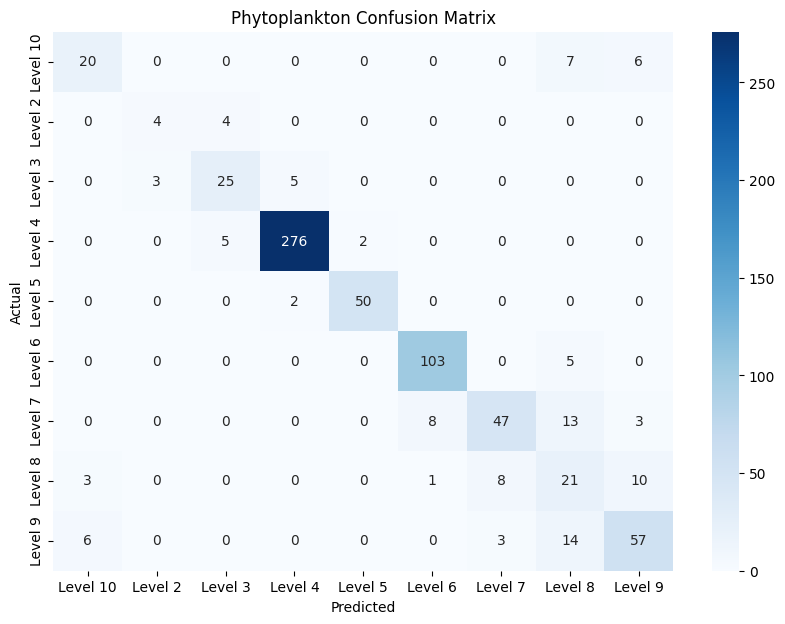

Zooplankton Classification Report:
              precision    recall  f1-score   support

    Level 10       1.00      1.00      1.00        12
     Level 2       1.00      1.00      1.00       133
     Level 3       0.91      0.94      0.92        31
     Level 4       0.92      0.84      0.88        77
     Level 5       0.59      0.94      0.73        50
     Level 6       0.71      0.60      0.65        57
     Level 7       0.90      0.81      0.86       164
     Level 8       0.86      0.88      0.87       122
     Level 9       0.95      0.95      0.95        65

    accuracy                           0.87       711
   macro avg       0.87      0.88      0.87       711
weighted avg       0.89      0.87      0.88       711

Zooplankton Accuracy: 0.8748241912798875


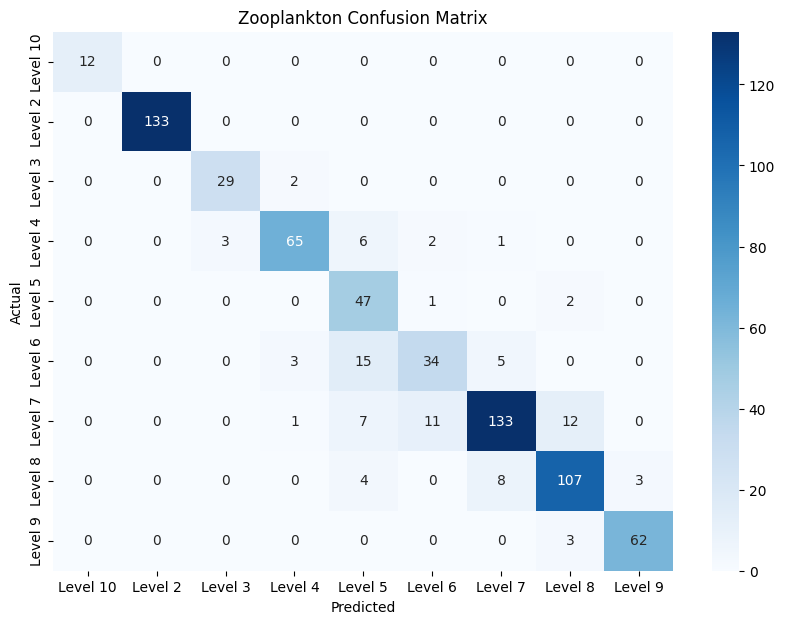

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('3500leveling.csv')

# Features
X = df[['Temp', 'PH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree classifier for Phytoplankton
dt_phyto = DecisionTreeClassifier(random_state=42)
dt_phyto.fit(X_train, y_phyto_train)

# Predict and evaluate for Phytoplankton
y_phyto_pred = dt_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Initialize and train the Decision Tree classifier for Zooplankton
dt_zoo = DecisionTreeClassifier(random_state=42)
dt_zoo.fit(X_train, y_zoo_train)

# Predict and evaluate for Zooplankton
y_zoo_pred = dt_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Phytoplankton Cross-Validation Accuracy Scores: [0.68635724 0.86075949 0.6971831  0.5        0.53521127]
Phytoplankton Mean Cross-Validation Accuracy: 0.6559022206374676
Phytoplankton Classification Report:
              precision    recall  f1-score   support

    Level 10       0.69      0.61      0.65        33
     Level 2       0.57      0.50      0.53         8
     Level 3       0.74      0.76      0.75        33
     Level 4       0.98      0.98      0.98       283
     Level 5       0.96      0.96      0.96        52
     Level 6       0.92      0.95      0.94       108
     Level 7       0.81      0.66      0.73        71
     Level 8       0.35      0.49      0.41        43
     Level 9       0.75      0.71      0.73        80

    accuracy                           0.85       711
   macro avg       0.75      0.74      0.74       711
weighted avg       0.86      0.85      0.85       711

Phytoplankton Accuracy: 0.8481012658227848


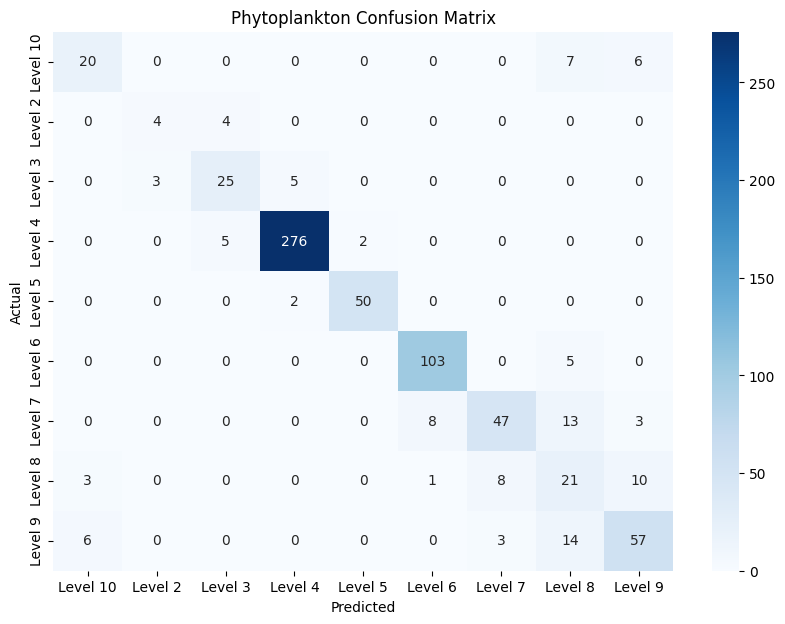

Zooplankton Cross-Validation Accuracy Scores: [0.41490858 0.55414909 0.44225352 0.61690141 0.43098592]
Zooplankton Mean Cross-Validation Accuracy: 0.4918397020661239
Zooplankton Classification Report:
              precision    recall  f1-score   support

    Level 10       1.00      1.00      1.00        12
     Level 2       1.00      1.00      1.00       133
     Level 3       0.91      0.94      0.92        31
     Level 4       0.92      0.84      0.88        77
     Level 5       0.59      0.94      0.73        50
     Level 6       0.71      0.60      0.65        57
     Level 7       0.90      0.81      0.86       164
     Level 8       0.86      0.88      0.87       122
     Level 9       0.95      0.95      0.95        65

    accuracy                           0.87       711
   macro avg       0.87      0.88      0.87       711
weighted avg       0.89      0.87      0.88       711

Zooplankton Accuracy: 0.8748241912798875


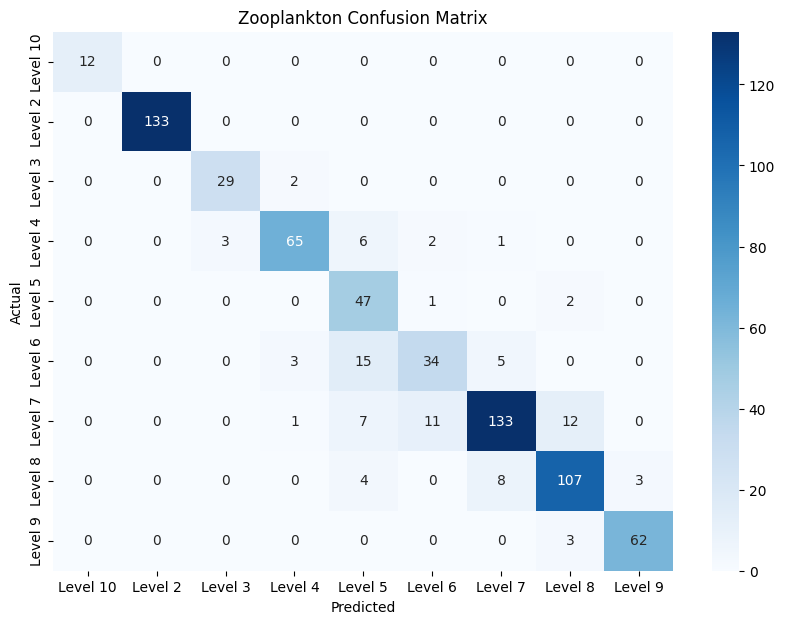

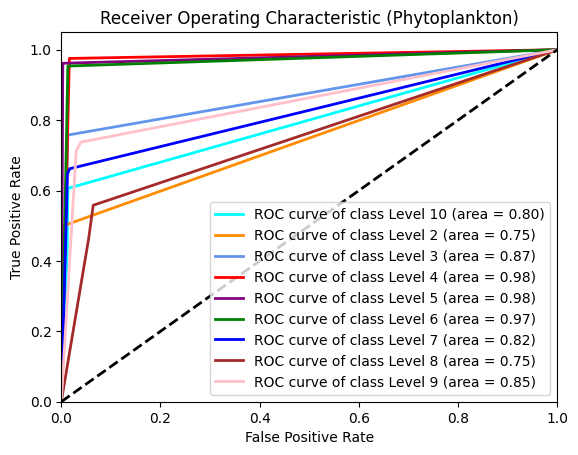

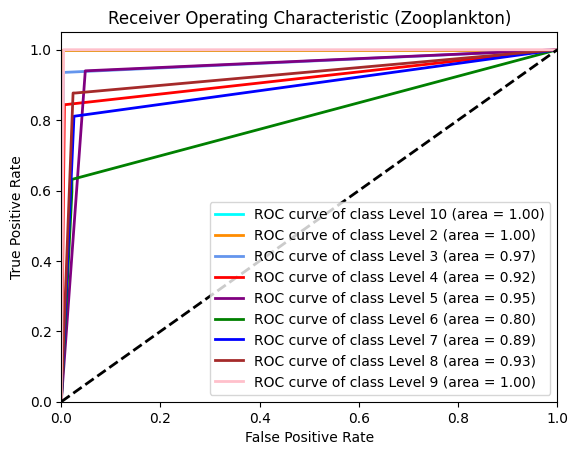

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

# Load the dataset from the CSV file
df = pd.read_csv('3500leveling.csv')

# Features
X = df[['Temp', 'pH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Binarize the labels for ROC curve
y_phyto_binarized = label_binarize(y_phyto_encoded, classes=range(len(le_phyto.classes_)))
y_zoo_binarized = label_binarize(y_zoo_encoded, classes=range(len(le_zoo.classes_)))

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree classifier for Phytoplankton
dt_phyto = DecisionTreeClassifier(random_state=42)
dt_phyto.fit(X_train, y_phyto_train)

# Cross-validation for Phytoplankton
cv_scores_phyto = cross_val_score(dt_phyto, X, y_phyto_encoded, cv=5, scoring='accuracy')
print("Phytoplankton Cross-Validation Accuracy Scores:", cv_scores_phyto)
print("Phytoplankton Mean Cross-Validation Accuracy:", cv_scores_phyto.mean())

# Predict and evaluate for Phytoplankton
y_phyto_pred = dt_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Initialize and train the Decision Tree classifier for Zooplankton
dt_zoo = DecisionTreeClassifier(random_state=42)
dt_zoo.fit(X_train, y_zoo_train)

# Cross-validation for Zooplankton
cv_scores_zoo = cross_val_score(dt_zoo, X, y_zoo_encoded, cv=5, scoring='accuracy')
print("Zooplankton Cross-Validation Accuracy Scores:", cv_scores_zoo)
print("Zooplankton Mean Cross-Validation Accuracy:", cv_scores_zoo.mean())

# Predict and evaluate for Zooplankton
y_zoo_pred = dt_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Binarize the test labels for ROC curve
y_phyto_test_binarized = label_binarize(y_phyto_test, classes=range(len(le_phyto.classes_)))
y_zoo_test_binarized = label_binarize(y_zoo_test, classes=range(len(le_zoo.classes_)))

# ROC Curve for Phytoplankton
y_phyto_score = dt_phyto.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le_phyto.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_phyto_test_binarized[:, i], y_phyto_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for Phytoplankton
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'green', 'blue', 'brown', 'pink'])
for i, color in zip(range(len(le_phyto.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_phyto.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Phytoplankton)')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Zooplankton
y_zoo_score = dt_zoo.predict_proba(X_test)

fpr_zoo = dict()
tpr_zoo = dict()
roc_auc_zoo = dict()
for i in range(len(le_zoo.classes_)):
    fpr_zoo[i], tpr_zoo[i], _ = roc_curve(y_zoo_test_binarized[:, i], y_zoo_score[:, i])
    roc_auc_zoo[i] = auc(fpr_zoo[i], tpr_zoo[i])

# Plot ROC curve for Zooplankton
plt.figure()
for i, color in zip(range(len(le_zoo.classes_)), colors):
    plt.plot(fpr_zoo[i], tpr_zoo[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_zoo.classes_[i], roc_auc_zoo[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Zooplankton)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

# Load the dataset from the CSV file
df = pd.read_csv('3500leveling.csv')

# Features
X = df[['Temp', 'PH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Binarize the labels for ROC curve
y_phyto_binarized = label_binarize(y_phyto_encoded, classes=range(len(le_phyto.classes_)))
y_zoo_binarized = label_binarize(y_zoo_encoded, classes=range(len(le_zoo.classes_)))

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42
)

# Define hyperparameters grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30, 40, 60],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Hyperparameter tuning for Phytoplankton
dt_phyto = DecisionTreeClassifier(random_state=42)
grid_search_phyto = GridSearchCV(estimator=dt_phyto, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_phyto.fit(X_train, y_phyto_train)

# Best parameters for Phytoplankton
print("Best parameters for Phytoplankton:", grid_search_phyto.best_params_)

# Use the best model to predict and evaluate Phytoplankton
best_dt_phyto = grid_search_phyto.best_estimator_
y_phyto_pred = best_dt_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning for Zooplankton
dt_zoo = DecisionTreeClassifier(random_state=42)
grid_search_zoo = GridSearchCV(estimator=dt_zoo, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_zoo.fit(X_train, y_zoo_train)

# Best parameters for Zooplankton
print("Best parameters for Zooplankton:", grid_search_zoo.best_params_)

# Use the best model to predict and evaluate Zooplankton
best_dt_zoo = grid_search_zoo.best_estimator_
y_zoo_pred = best_dt_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Phytoplankton
y_phyto_score = best_dt_phyto.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le_phyto.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_phyto_binarized[:, i], y_phyto_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for Phytoplankton
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'green', 'blue', 'brown', 'pink'])
for i, color in zip(range(len(le_phyto.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_phyto.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Phytoplankton)')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Zooplankton
y_zoo_score = best_dt_zoo.predict_proba(X_test)

fpr_zoo = dict()
tpr_zoo = dict()
roc_auc_zoo = dict()
for i in range(len(le_zoo.classes_)):
    fpr_zoo[i], tpr_zoo[i], _ = roc_curve(y_zoo_binarized[:, i], y_zoo_score[:, i])
    roc_auc_zoo[i] = auc(fpr_zoo[i], tpr_zoo[i])

# Plot ROC curve for Zooplankton
plt.figure()
for i, color in zip(range(len(le_zoo.classes_)), colors):
    plt.plot(fpr_zoo[i], tpr_zoo[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_zoo.classes_[i], roc_auc_zoo[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Zooplankton)')
plt.legend(loc="lower right")
plt.show()
